In [1]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd
import os

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = 0, n_components = 1, name="test1", noise=0.5, replicates = 3)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="test2", noise=0.5, replicates = 3)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="test3", noise=0.5, replicates = 3, time_step=1)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="test4", noise=0.5, replicates = 3, time_step=1)
df = df.append(df2, ignore_index=True)

These data can be exported to either excel or csv format

In [3]:
#file_parser.export(df,os.path.join("test_data","independent_data.xlsx"))

In [4]:
#file_parser.export_csv(df,os.path.join("test_data","independent_data.csv"))

In [5]:
df = file_parser.read_excel(os.path.join("test_data","data.xlsx"))

## Plot periodograms

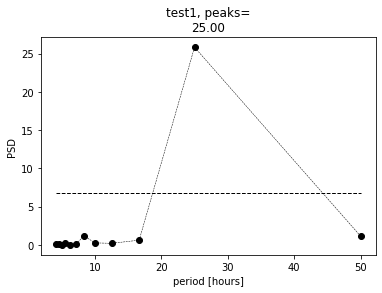

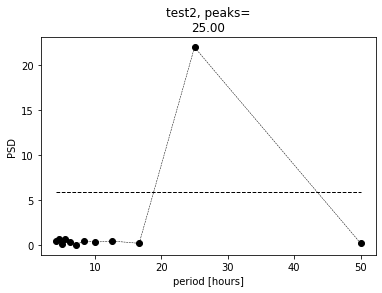

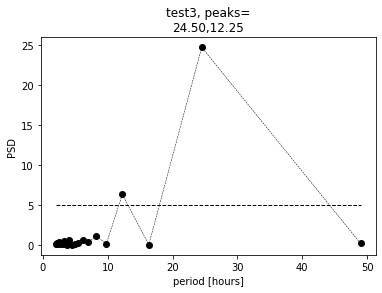

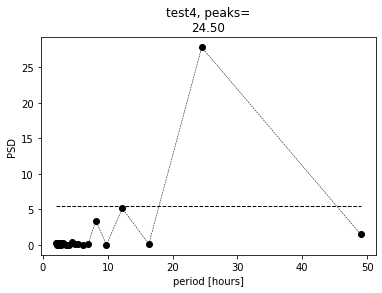

In [6]:
cosinor.periodogram_df(df)

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

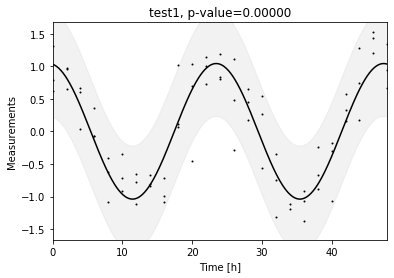

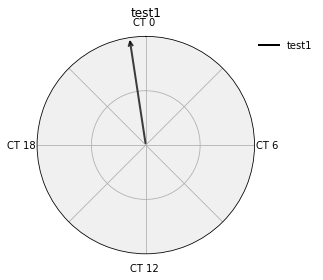

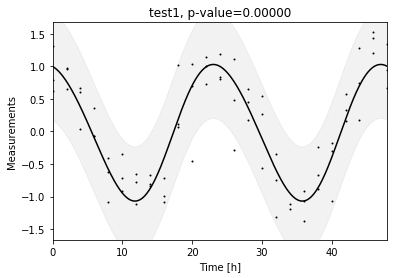

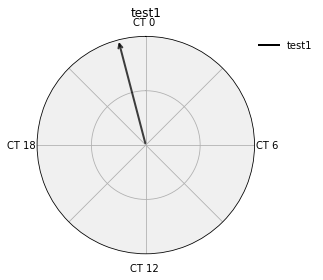

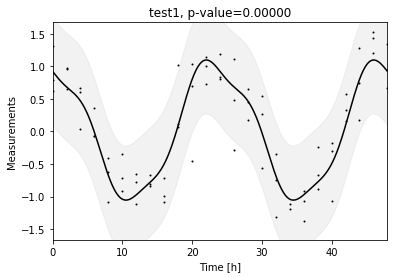

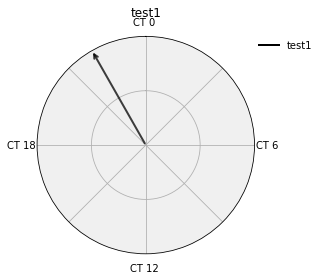

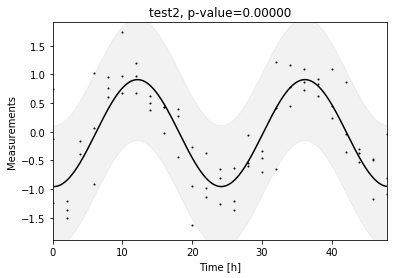

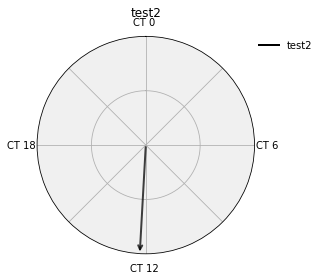

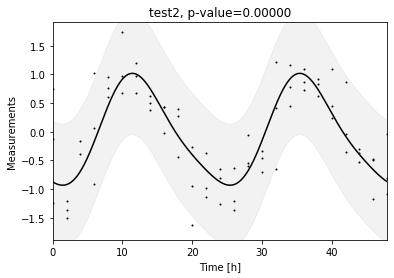

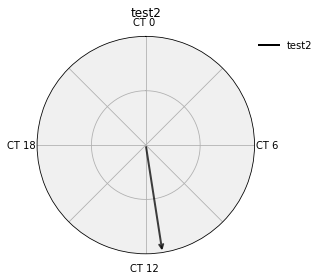

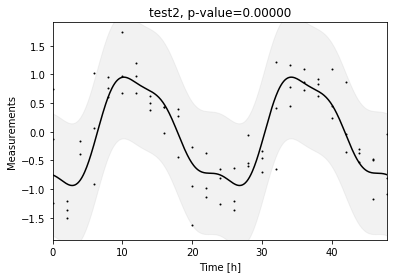

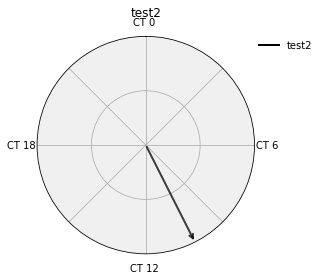

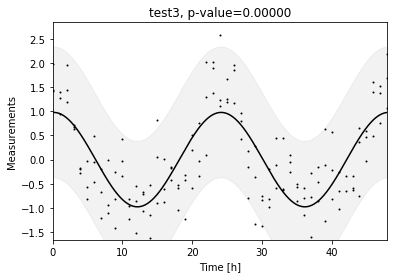

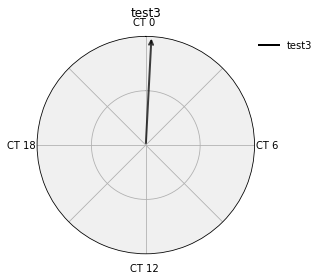

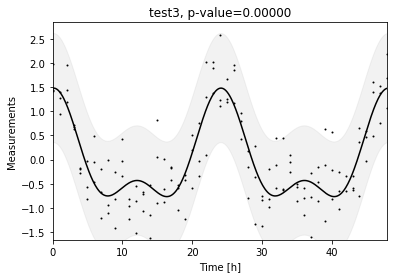

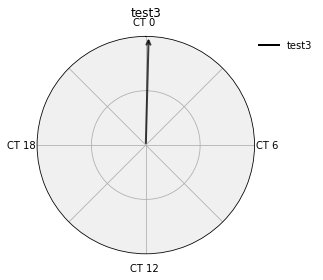

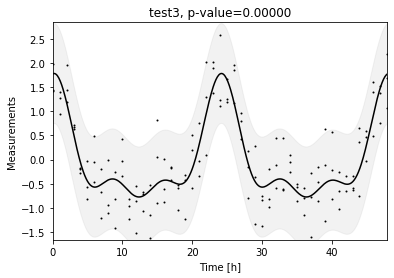

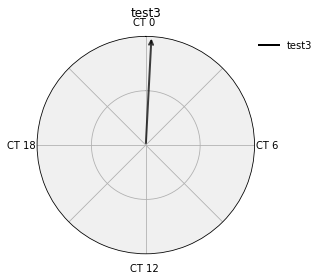

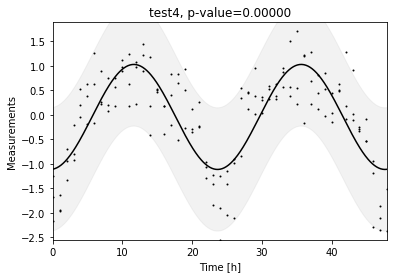

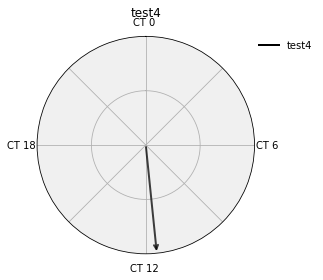

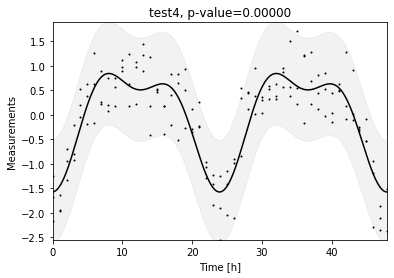

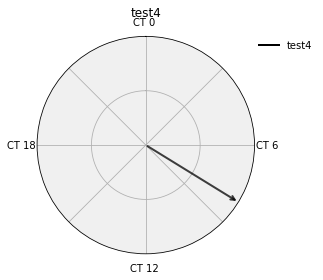

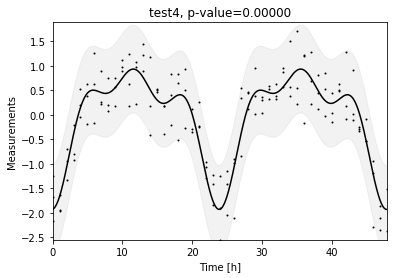

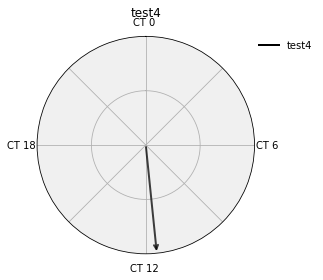

In [7]:
df_results = cosinor.fit_group(df, n_components = [1,2,3], period=24) #folder=""

Get the best fitting periods with criterium 'RSS' (```reverse=False``` means lower is better)

In [8]:
df_best_fits = cosinor.get_best_fits(df_results, n_components = [1,2,3], criterium='RSS', reverse = False)
df_best_fits.to_csv("supp_table_1.csv", index=False)

or get the best models (the best fitting periods and the best fitting models - in dependence on the number of components; by default the criterium is p-value)

In [9]:
df_best_models = cosinor.get_best_models(df, df_results, n_components = [1,2,3])

... and plot these models (together with qq-plots and phase diagrams).

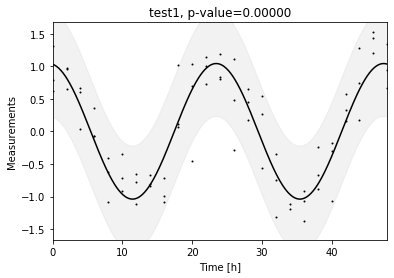

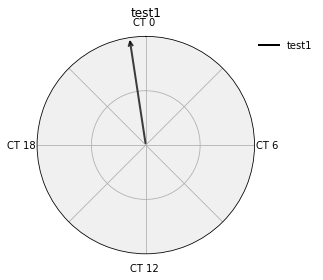

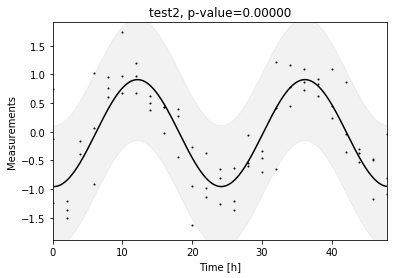

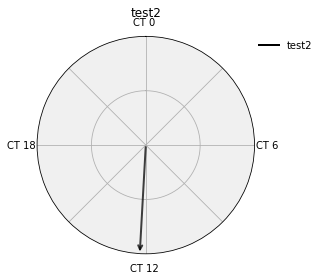

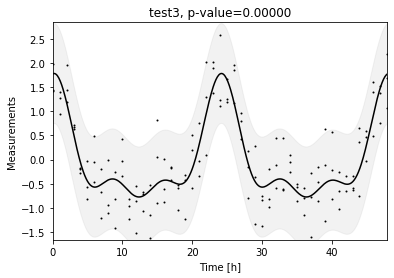

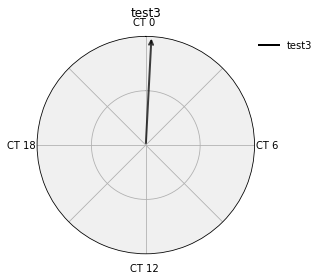

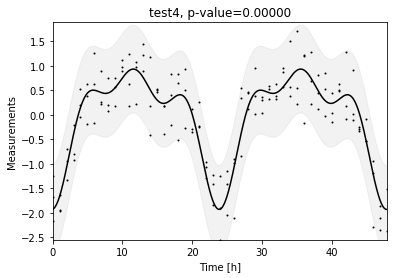

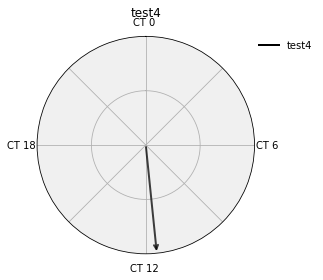

In [10]:
#cosinor.plot_df_models(df, df_best_models, folder="paper")
cosinor.plot_df_models(df, df_best_models)

Display the results or store the results as a csv file:

In [11]:
df_best_models

,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,...,period(est),amplitude,acrophase,mesor,peaks,heights,troughs,heights2,ME,resid_SE
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,0.169409,0.254113,11.512154,0.784755,0.778776,...,24.0,1.039764,-6.132238,0.002031,[23.423423423423426],[1.0417527895534135],[11.411411411411413],[-1.0376503623054327],0.797114,0.399864
1,test2,24.0,1.0,2.220446e-16,2.664535e-16,0.247727,0.330303,19.738163,0.631150,0.620904,...,24.0,0.932110,-3.197150,-0.022534,[12.212212212212213],[0.909543628170932],[0.2002002002002002],[-0.9546338325238869],1.043747,0.523585
2,test3,24.0,3.0,1.110223e-16,1.480297e-16,0.054029,0.129669,36.586735,0.734156,0.722763,...,24.0,1.276843,-0.052412,0.503533,[0.2002002002002002],[1.7803386532554812],"[6.106106106106107, 12.412412412412413, 18.218...","[-0.5691918677907137, -0.7732614633253607, -0....",1.010686,0.511208
3,test4,24.0,3.0,1.110223e-16,1.480297e-16,0.691870,0.691870,27.473154,0.808208,0.799988,...,24.0,1.431859,-3.039913,-0.497420,"[5.805805805805806, 11.611611611611613, 18.318...","[0.5042794404234394, 0.9343248864017997, 0.410...",[23.923923923923926],[-1.92895629375945],0.875808,0.442986


Analyse the best models with bootstrapping and sampling of confidence intervals of regression coefficients.

In [12]:
df_results_extended = cosinor.analyse_best_models(df, df_best_models, additional_analysis="CI")

In [13]:
df_results_extended

,test,period,n_components,p,q,p_reject,q_reject,amplitude,acrophase,CI(amplitude),p(amplitude),q(amplitude),CI(acrophase),p(acrophase),q(acrophase)
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,0.169409,0.254113,1.039764,-6.132238,"[0.8952855767974073, 1.1842423844647068]",0.000000e+00,0.000000e+00,"[-0.006289474781962845, 0.30818426431611545]",0.059631,0.079508
1,test2,24.0,1.0,2.220446e-16,2.664535e-16,0.247727,0.330303,0.932110,-3.197150,"[0.7474160250297699, 1.116803239513162]",2.442491e-15,2.442491e-15,"[2.8763864669504136, 3.2956847857478513]",0.000000,0.000000
2,test3,24.0,3.0,1.110223e-16,1.480297e-16,0.054029,0.129669,1.276843,-0.052412,"[1.0263547833386506, 1.527332097283394]",0.000000e+00,0.000000e+00,"[-0.18344301447387856, 0.07861843477451913]",0.430386,0.430386
3,test4,24.0,3.0,1.110223e-16,1.480297e-16,0.691870,0.691870,1.431859,-3.039913,"[1.2303020362849315, 1.6334151985081293]",0.000000e+00,0.000000e+00,"[-5.975001042863471, -0.10482457969935943]",0.042463,0.079508


## Cosinor1 analysis

Only 1-component model can be used, but the statistics is much richer...

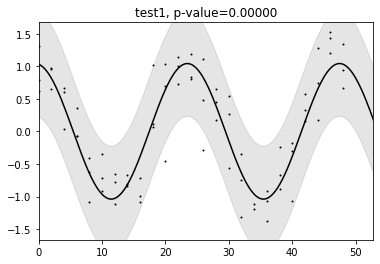

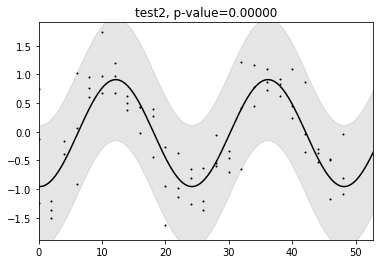

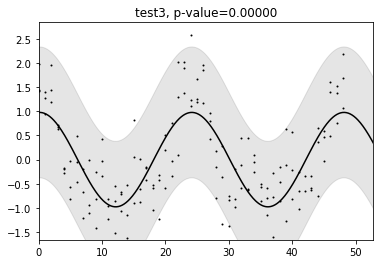

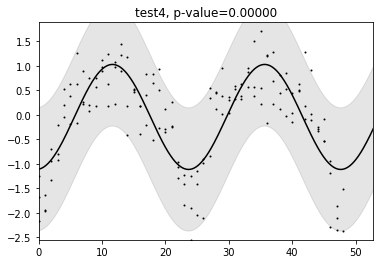

In [14]:
df_results = cosinor1.fit_group(df, period=[24])

In [15]:
df_results.to_csv("supp_table_2.csv", index=False)

## Comparison analysis

Define the pairs to compare

In [16]:
pairs = (["test1", "test2"],["test3", "test4"])

### Comparison using cosinor1
The most informative

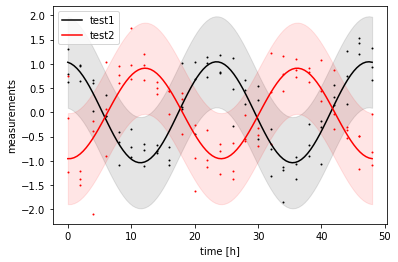

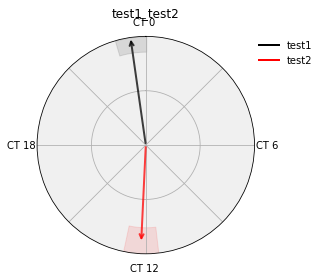

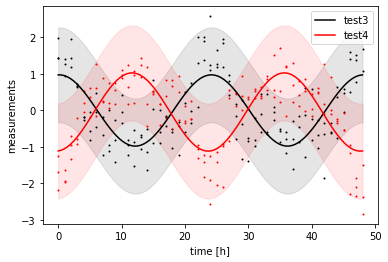

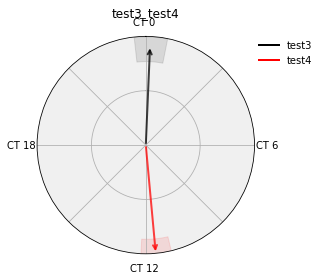

In [17]:
#compare_cosinor1 = cosinor1.test_cosinor_pairs(df, pairs, period=24, folder='paper' )
compare_cosinor1 = cosinor1.test_cosinor_pairs(df, pairs, period=24)

In [18]:
compare_cosinor1[["test", "q(d_amplitude)", "q(d_acrophase)"]]

,test,q(d_amplitude),q(d_acrophase)
0,test1 vs. test2,0.372013,1.164985e-153
1,test3 vs. test4,0.372013,9.622936e-174


In [19]:
compare_cosinor1.to_csv("supp_table_3.csv", index=False)

### Comparison using multi-component cosinor and LimoRhyde

Use an 1-component cosinor for first pair

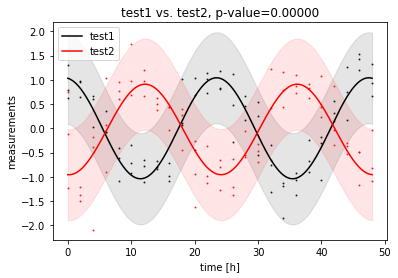

In [20]:
df_cosinor_lm1 = cosinor.compare_pairs(df, pairs[:1], n_components = 1, period = 24)#, folder = 'results\\test_limo_tester\\')

In [21]:
df_cosinor_lm1

,test,period,n_components,d_amplitude,d_acrophase,p,q,p params,q params,p(F test),q(F test)
0,test1 vs. test2,24,1,-0.107655,2.943474,7.112734e-37,7.112734e-37,5.180330e-40,5.180330e-40,1.110223e-16,1.110223e-16


Use a 3-component cosinor for second pair

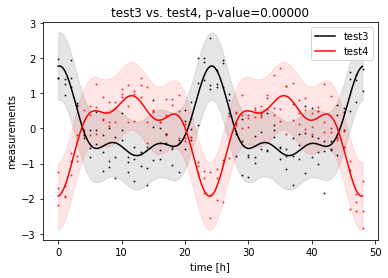

In [22]:
df_cosinor_lm2 = cosinor.compare_pairs(df, pairs[1:], n_components = 3, period = 24)#, folder = 'results\\test_limo_tester\\')

In [23]:
df_cosinor_lm2

,test,period,n_components,d_amplitude,d_acrophase,p,q,p params,q params,p(F test),q(F test)
0,test3 vs. test4,24,3,0.155029,-2.981211,6.414126e-82,6.414126e-82,4.208287e-74,4.208287e-74,1.110223e-16,1.110223e-16


Extended comparison using bootstrapping or sampling of regression coefficients confidence intervals.

In [24]:
df_cosinor_lm = cosinor.compare_pairs_best_models(df, df_best_models, pairs, plot=False, additional_analysis="CI1")

In [25]:
df_cosinor_lm

,test,period1,n_components1,period2,n_components2,d_amplitude,d_acrophase,p,q,p params,q params,p(F test),q(F test),CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase)
0,test1 vs. test2,24.0,1.0,24.0,1.0,-0.107655,2.943474,7.112734e-37,7.112734e-37,5.180330e-40,5.180330e-40,1.110223e-16,1.110223e-16,"[-0.4385045720351579, 0.22319587531597573]",0.521148,0.521148,"[2.5944083475591375, 3.2757681156049747]",0.000000,0.000000
1,test3 vs. test4,24.0,3.0,24.0,3.0,0.155029,-2.981211,6.414126e-82,1.282825e-81,4.208287e-74,8.416573e-74,1.110223e-16,1.110223e-16,"[-0.3065012414155963, 0.6165315955866126]",0.509044,0.521148,"[-6.152154582555387, 0.1771535396919166]",0.064179,0.064179


### Comparison using non-linear regression

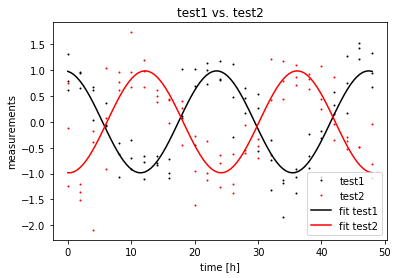

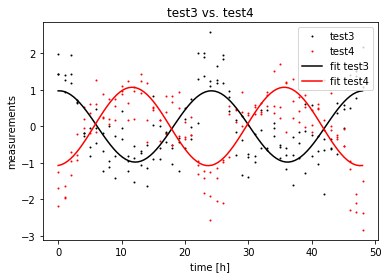

In [26]:
df_cosinor_nonlin = cosinor.compare_nonlinear_pairs(df, pairs, min_per=23.99, max_per=24)#, folder = 'results\\test_nonlin_tester\\')

In [27]:
df_cosinor_nonlin

,test,p,q,p_reject,q_reject,Amp,Base,ME,Per,Phase,...,p(dBase),p(dPhase),q(Amp),q(Base),q(Per),q(Phase),q(dAmp),q(dBase),q(dPhase),resid_SE
0,test1 vs. test2,1.110223e-16,1.110223e-16,1.0,1.0,0.986710,1.627853e-14,0.927775,23.99,0.138103,...,1.0,0.0,0.0,1.0,0.0,0.297053,1.000000,1.0,0.0,0.469357
1,test3 vs. test4,1.110223e-16,1.110223e-16,1.0,1.0,0.976128,1.213200e-16,1.292206,24.00,6.240174,...,1.0,0.0,0.0,1.0,0.0,0.000000,0.731232,1.0,0.0,0.656521
